In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Getting some stats
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

#### Explaination
You can tell rightaway that the data's means is far from each other,
which will negatively affects our model performance.
Hence, we need to scale our data using some standard scalar 
to have the same range and mean

In [4]:
print(df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


#### Explaination
The samples for non-diabetic patients is way more the one who 
have diabetes, which can show some bias in our results because 
the model will always think that 75% are non-diabetes, which is deluding.

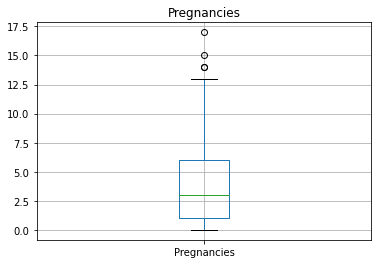

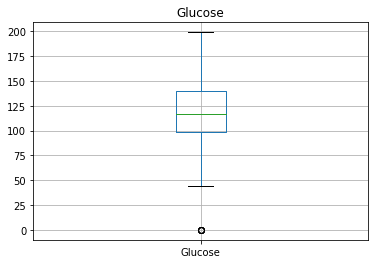

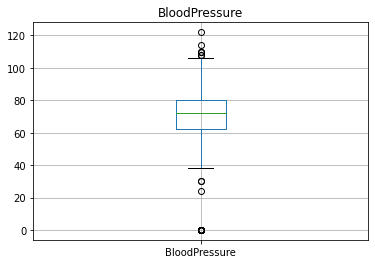

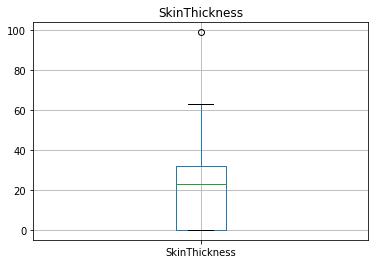

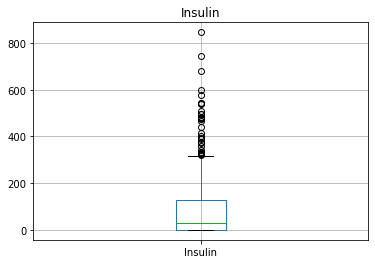

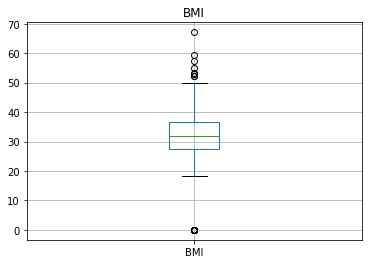

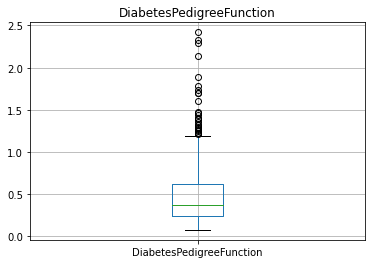

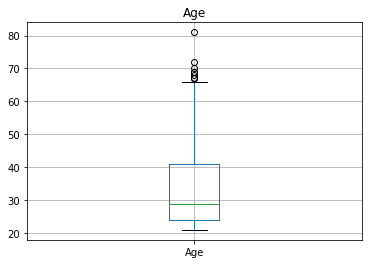

In [12]:
for idx, col in enumerate(df.columns):
    if col != 'Outcome':
        ax = df.boxplot(column=col)
        ax.set_title(col)
        plt.show()

#### Explaination
* We can see the ```insulin``` column has the greatest numner of outliers.
* Also, the columns = ```Age, Insulin, SkinThickness, Pregenancies``` are skewed towards lower values
* the dataset has more than 50% of females under 31 years old.

In [13]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


* Patients with diabetes mostly have higher ```Glucose``` Levels 
* There is huge difference in levels in ```Insulin``` between diabetic and non-diabetic
* Older people usually have diabetes